<a href="https://colab.research.google.com/github/anirudh135/Breast-Cancer-Wisconsin-Prognostic-/blob/master/Breast_Cancer_wisconsin(Prognostic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict,GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA


# visualization
import seaborn as sns


import warnings as warn
warn.filterwarnings("ignore")

# part1 
#### Build a classifier to predict the outcome of a new patient with high accuracy. Also, rememberthat as a data-scientist working on healthcare problems, your intent should also be to minimize the number of false-negatives.

# Loading and Cleaning data 

In [ ]:
#reading the dataset from excel to dataframe
df = pd.read_excel('BreastCancer_Prognostic_v1.xlsx')
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [ ]:
#looking for rows and columns
df.shape

(198, 35)

In [ ]:
#gathering basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         198 non-null    int64  
 1   Outcome                    198 non-null    object 
 2   Time                       198 non-null    int64  
 3   radius_mean                198 non-null    float64
 4   texture_mean               198 non-null    float64
 5   perimeter_mean             198 non-null    float64
 6   area_mean                  198 non-null    float64
 7   smoothness_mean            198 non-null    float64
 8   compactness_mean           198 non-null    float64
 9   concavity_mean             198 non-null    float64
 10  concave_points_mean        198 non-null    float64
 11  symmetry_mean              198 non-null    float64
 12  fractal_dimension_mean     198 non-null    float64
 13  radius_std_dev             198 non-null    float64

In [ ]:
#check for missing variables
df.isnull().any()

ID                           False
Outcome                      False
Time                         False
radius_mean                  False
texture_mean                 False
perimeter_mean               False
area_mean                    False
smoothness_mean              False
compactness_mean             False
concavity_mean               False
concave_points_mean          False
symmetry_mean                False
fractal_dimension_mean       False
radius_std_dev               False
texture_std_dev              False
perimeter_std_dev            False
area_std_dev                 False
smoothness_std_dev           False
compactness_std_dev          False
concavity_std_dev            False
concave_points_std_dev       False
symmetry_std_dev             False
fractal_dimension_std_dev    False
Worst_radius                 False
Worst_texture                False
Worst_perimeter              False
Worst_area                   False
Worst_smoothness             False
Worst_compactness   

In [ ]:
# the last column of our data set is of type : object
# we need to check and replace the unknown values from 'Lymph__Node_Status' first
# we will be doing this simple imputer 

imputer = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
imputer = imputer.fit(df.iloc[:,26:])
df.iloc[:,26:] = imputer.transform(df.iloc[:,26:])

In [ ]:
# also the 'Outcome ' column of our data set is categorical and will change it using label encoder
l = LabelEncoder()
df['Outcome'] = l.fit_transform(df['Outcome'])

In [ ]:
# and then we change all the column types to float as training models work good on numeric values
df = df.apply(pd.to_numeric, errors='coerce').astype('float64')
print(df.dtypes)

ID                           float64
Outcome                      float64
Time                         float64
radius_mean                  float64
texture_mean                 float64
perimeter_mean               float64
area_mean                    float64
smoothness_mean              float64
compactness_mean             float64
concavity_mean               float64
concave_points_mean          float64
symmetry_mean                float64
fractal_dimension_mean       float64
radius_std_dev               float64
texture_std_dev              float64
perimeter_std_dev            float64
area_std_dev                 float64
smoothness_std_dev           float64
compactness_std_dev          float64
concavity_std_dev            float64
concave_points_std_dev       float64
symmetry_std_dev             float64
fractal_dimension_std_dev    float64
Worst_radius                 float64
Worst_texture                float64
Worst_perimeter              float64
Worst_area                   float64
W

# Exploratory Data Analysis

In [ ]:
# let us first look at the basic statistical imfo of our dataset 
# also index column of our dataset ' ID ' does not significance over the outcome of our models so we will ignore it.
df.iloc[:,1:].describe()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
count,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.237374,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.146465
std,0.426552,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.442245
min,0.000000,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,0.000000,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,0.000000,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,0.000000,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,1.000000,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [ ]:
#skew
df.iloc[:,1:].skew()

Outcome                      1.243958
Time                         0.514322
radius_mean                  0.313726
texture_mean                 0.571373
perimeter_mean               0.395228
area_mean                    0.721115
smoothness_mean              0.443359
compactness_mean             0.614172
concavity_mean               0.682186
concave_points_mean          0.697699
symmetry_mean                0.775116
fractal_dimension_mean       0.999702
radius_std_dev               1.257108
texture_std_dev              1.309493
perimeter_std_dev            1.262808
area_std_dev                 1.810762
smoothness_std_dev           3.905352
compactness_std_dev          2.087198
concavity_std_dev            1.749850
concave_points_std_dev       1.280522
symmetry_std_dev             2.130190
fractal_dimension_std_dev    1.683379
Worst_radius                 0.615087
Worst_texture                0.402984
Worst_perimeter              0.657266
Worst_area                   1.209471
Worst_smooth

[Text(0, 0, 'N'), Text(0, 0, 'R')]

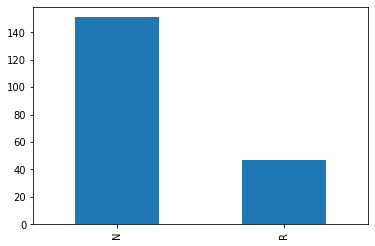

In [ ]:
#visual representation of number of recurring and non recurring cases.
df.iloc[:,1].value_counts().plot(kind = 'bar').set_xticklabels(['N','R'])

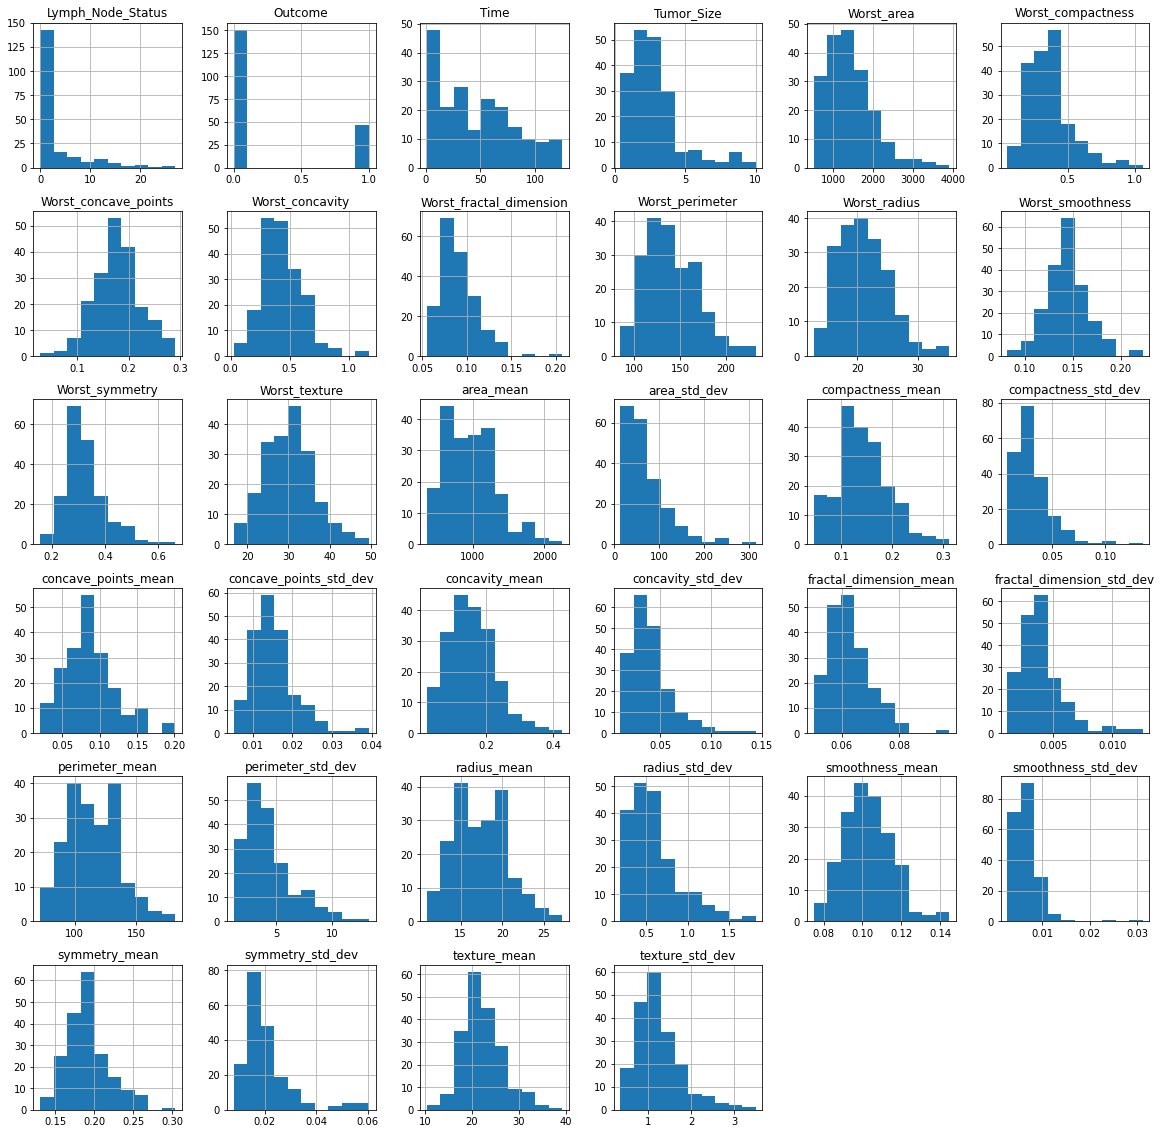

In [ ]:
# plotting histograms
df.iloc[:,1:].hist(figsize = (20,20))
plt.show()

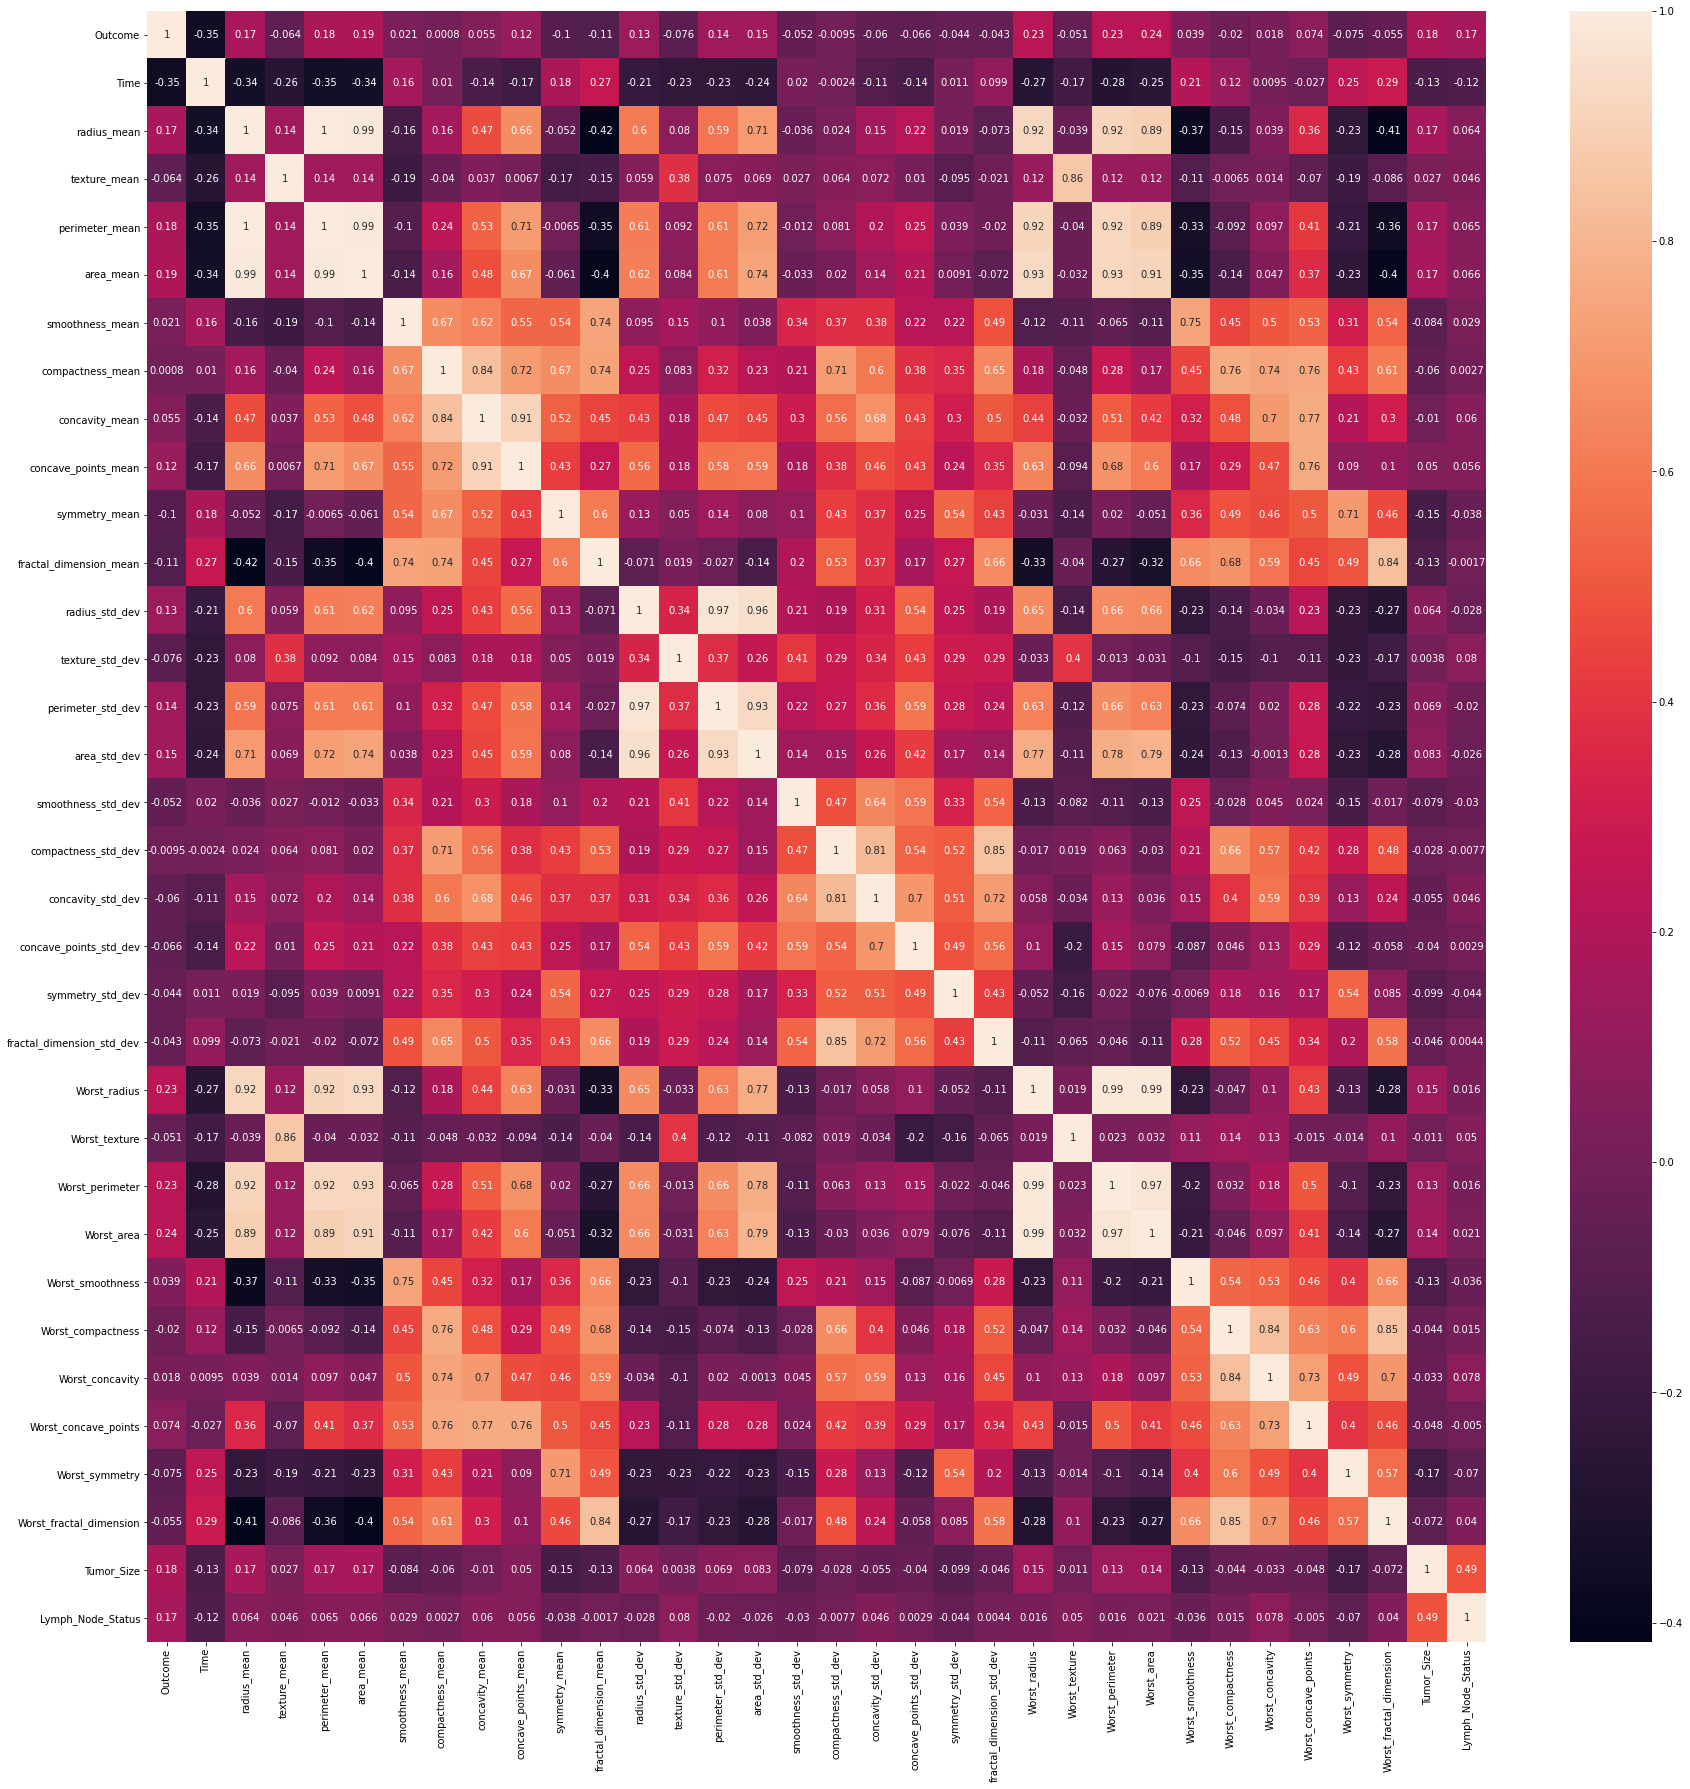

In [ ]:
# Reducing Dimensions 
fig, ax = plt.subplots(figsize=(30,30))    
corr = df.iloc[:,1:].corr()
sns.heatmap(df.iloc[:,1:].corr(), 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot = True)

In [ ]:
# we can see that we can remove one of area , radius and perimeter parameter as they have a very high co-relation.
columns = ['radius_mean','perimeter_mean','radius_std_dev','perimeter_std_dev','Worst_radius','Worst_perimeter']
df = df.drop(columns,axis = 1)
df.head()

,ID,Outcome,Time,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_texture,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513.0,0.0,31.0,27.60,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,1.8900,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,37.08,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423.0,0.0,61.0,10.38,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517.0,0.0,116.0,17.44,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.6105,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,20.98,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483.0,0.0,123.0,20.38,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584.0,1.0,27.0,14.34,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


# Data Pre-processing

In [ ]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(df)

In [ ]:
#Assign predictors to a variable of ndarray (matrix) type
Xs = df.iloc[:,2:]
y = df.iloc[:,1]

In [ ]:
##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( Xs, y, test_size=0.30, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((138, 27), (138,), (60, 27), (60,))

# Modelling ( Classification with cross- validation)

In [ ]:
#Modelling

models = []
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'SVM' , SVC()))
models.append(('GNB', GaussianNB()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring =  'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring =  'accuracy'
results = []
names = []
print('-> 10-Fold cross-validation accuracy score and confusion matrix for the training data for 3 classifiers')
for name, model in models:
 kfold = KFold(n_splits=num_instances, random_state=seed, shuffle=False)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 y_pred = cross_val_predict(model, X_test, y_test, cv=10)
 conf_mat = confusion_matrix(y_test, y_pred)
 results.append(cv_results)
 clas_rep = classification_report(y_test,y_pred)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
 print(conf_mat)
 print(clas_rep)
 print("")



-> 10-Fold cross-validation accuracy score and confusion matrix for the training data for 3 classifiers
CART: 0.702899 (0.456982)
[[38 12]
 [10  0]]
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78        50
         1.0       0.00      0.00      0.00        10

    accuracy                           0.63        60
   macro avg       0.40      0.38      0.39        60
weighted avg       0.66      0.63      0.65        60


SVM: 0.724638 (0.446697)
[[50  0]
 [10  0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        50
         1.0       0.00      0.00      0.00        10

    accuracy                           0.83        60
   macro avg       0.42      0.50      0.45        60
weighted avg       0.69      0.83      0.76        60


GNB: 0.688406 (0.463145)
[[36 14]
 [ 8  2]]
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        5

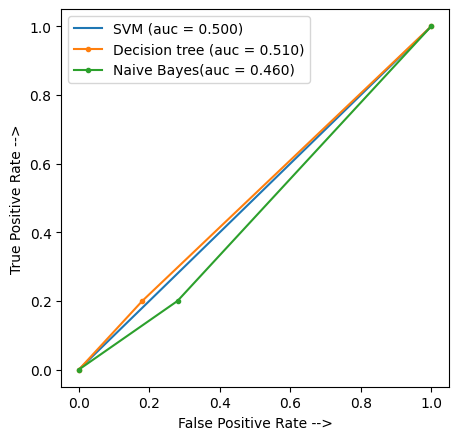

In [ ]:
# Roc and Auc analysis on the classifiers.
y_pred_dt = cross_val_predict( DecisionTreeClassifier(), X_test, y_test, cv=10)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)

y_pred_svm = cross_val_predict( SVC(), X_test, y_test, cv=10)
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

y_pred_gnb = cross_val_predict( GaussianNB(), X_test, y_test, cv=10)
gnb_fpr, gnb_tpr, threshold = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(gnb_fpr, gnb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision tree (auc = %0.3f)' % auc_dt)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Naive Bayes(auc = %0.3f)' % auc_gnb)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
# After applying classifiers with cross validation on all the 3 classifiers we found the thier accuracy
# And also with the false postive and true positive rates plotted the ROC - AUC curves.
# We can conclude that SVM (Support Vector Machine) has better performance 
# We will be further working on SVM to reduce number of False Negative rates and Increase acuuracy.

# Optimisation

In [ ]:
# we will be be optimising our SVM classifiers using the following methods:
# Hyperparameter tuning with GridSearchCV

In [ ]:
# Hyperparameter tuning with GridSearchCV
#defining the parameters
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}



In [ ]:
#tuning parameters to find the best parameters for SVC 
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3,verbose = 10,n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.5min


In [ ]:
# printing the best parameters for increasing accuracy
grid.best_params_

In [ ]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

In [ ]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred ))

In [ ]:
df1 = pd.DataFrame(y_pred.reshape(-1, len(y_pred)))
df1.to_excel('Outcome_prediction.xlsx')